<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vader" data-toc-modified-id="Vader-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vader</a></span><ul class="toc-item"><li><span><a href="#Vader" data-toc-modified-id="Vader-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vader</a></span></li></ul></li><li><span><a href="#Text-Blob" data-toc-modified-id="Text-Blob-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text Blob</a></span></li><li><span><a href="#AFINN" data-toc-modified-id="AFINN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AFINN</a></span></li><li><span><a href="#Comparing-Methods" data-toc-modified-id="Comparing-Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing Methods</a></span></li></ul></div>

# Libraries

In [12]:
import pandas as pd


import nltk

# Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# External file
import random_functions
import lexicon_based


#
pd.set_option('display.max_columns', None)

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# functions = [func for func in dir(lexicon_based) if callable(getattr(lexicon_based, func))]

# # Print the list of functions
# print("Functions in the external module:")
# for func in functions:
#     print(func)

# Data

In [3]:
data = pd.read_csv('/Users/antoniooliveira/Downloads/airlines_reviews.csv')

In [4]:
data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [23]:
#Create new function to convert Rating scores to 3 categories
#1-4, 5-6, 7-10 forms negative, neutral, positive [0,1,2]
def score_convert_senti(score):
    if score <= 4:
        return -1
    elif score >= 5 and score <= 6: #and score <= 6
        return 0
    elif score >=7:
        return 1

#Create new column, convert scoring into 3 categories
data["Sentiment"] = data["Overall Rating"].apply(score_convert_senti)

#dataset has derived sentiment column added
data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,1,"flight amaz. the crew onboard flight welcom, g...",0.8555,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp..."
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,-1,book emerg exit seat still meant huge discomfo...,-0.8074,"{'neg': 0.301, 'neu': 0.582, 'pos': 0.116, 'co..."
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,1,excel perform front. would definit choos use a...,0.4588,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp..."
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,1,pretti comfort flight consid fli economi class...,0.9565,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,1,the servic consist good start finish. the cabi...,0.9168,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp..."


# Preprocessing for Lexicon-based

In [31]:
 data['Title_1'] = data['Title'].apply(lambda text: random_functions.preprocessor(text,
                 lowercase=False, 
                 leave_punctuation = True, 
                 remove_stopwords = True,
                 stop_words = stop_words,
                 correct_spelling = False, 
                 lemmatization=False, 
                 porter_stemming=True,
                 tokenized_output=False, 
                 sentence_output=False,
                 remove_emojis=False))

In [6]:
data['Reviews_1'].sample()

320    [ho, chi, minh, citi, lo, angel, via, singapor...
Name: Reviews_1, dtype: object

## Vader

In [32]:
data["vader_polarity_compound"] = data["Title_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review)))

data["vader_polarity_scores"] = data["Title_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review), compound = False))

In [33]:
data.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
-1,3403.0,-0.100014,0.277015,-0.8481,-0.3182,0.0000,0.0000,0.7269
0,782.0,0.020516,0.280732,-0.7430,0.0000,0.0000,0.0000,0.8555
1,3915.0,0.253371,0.282528,-0.7783,0.0000,0.3612,0.4588,0.8779


In [29]:
data.loc[(data['vader_polarity_compound'] > 0) & (data['Sentiment'] == -1)]

# use Overall Rating as a Ground truth and compare with vader
# see how it varies accross the year
# make a different class split

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores
8,left me deeply disappointed,A Kalarsan,2024-02-18,Singapore Airlines,True,I embarked on a journey with high hopes and ...,Business,February 2024,Singapore to Jakarta,Economy Class,5,4,5,5,3,4,no,-1,"embark journey high hope anticip, secur connec...",0.7650,"{'neg': 0.077, 'neu': 0.824, 'pos': 0.099, 'co..."
13,regional seat was really uncomfortable,L Hee,2024-02-16,Singapore Airlines,True,I was one of the last business class passeng...,Solo Leisure,January 2024,Singapore to Tokyo Haneda,Business Class,5,1,5,5,3,2,yes,-1,"one last busi class passeng board, went seat o...",0.8126,"{'neg': 0.02, 'neu': 0.867, 'pos': 0.113, 'com..."
16,agent took out travel insurance on my behalf,Niki Kladis,2024-01-29,Singapore Airlines,True,"For my final trip booked for July 2024, Sing...",Solo Leisure,December 2023,Sydney to Istanbul via Singapore,Business Class,4,5,4,5,3,2,no,-1,"for final trip book juli 2024, singapor cancel...",0.1280,"{'neg': 0.059, 'neu': 0.874, 'pos': 0.067, 'co..."
19,not fly with them in the future,H Paran,2024-01-18,Singapore Airlines,True,I flew on SQ217 from Singapore to Melbourne ...,Couple Leisure,January 2024,Singapore to Melbourne,Economy Class,1,1,1,1,1,2,no,-1,flew sq217 singapor melbourn 4th januari. my f...,0.8290,"{'neg': 0.088, 'neu': 0.784, 'pos': 0.128, 'co..."
20,Barely any room to move,Sean Wise,2024-01-16,Singapore Airlines,True,"Barely any room to move, woke up to getting ...",Family Leisure,January 2024,Singapore to Adelaide,Economy Class,1,5,2,3,1,1,no,-1,"bare room move, woke get knee crush passeng fr...",0.2263,"{'neg': 0.069, 'neu': 0.823, 'pos': 0.108, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,never take Korean Air anymore,Y Peck,2017-05-13,Korean Air,False,Singapore to Seoul return. I will never take...,Family Leisure,May 2017,Seoul to Singapore,Economy Class,5,5,4,2,1,1,no,-1,singapor seoul return. never take korean air a...,0.6948,"{'neg': 0.109, 'neu': 0.699, 'pos': 0.191, 'co..."
8068,I wish never made the purchase,James Lee,2017-02-22,Korean Air,True,Seoul to Los Angeles. If you are buying a ti...,Couple Leisure,September 2016,Seoul to Los Angeles,Economy Class,4,5,5,4,3,4,yes,-1,"seoul lo angel. if buy ticket someon els, buy....",0.9393,"{'neg': 0.036, 'neu': 0.771, 'pos': 0.192, 'co..."
8078,my last flight with them,Julia Lee,2016-12-13,Korean Air,True,"Hong Kong to Nadi, Fiji via Seoul. It was my...",Solo Leisure,December 2016,HKG to NAN via ICN,Economy Class,5,3,4,3,2,1,no,-1,"hong kong nadi, fiji via seoul. it first fligh...",0.9050,"{'neg': 0.125, 'neu': 0.679, 'pos': 0.196, 'co..."
8083,counter service was horrible,S Vistaphon,2016-10-17,Korean Air,True,Washington to Seoul Incheon. The Korean Air ...,Solo Leisure,October 2016,IAD to ICN,Economy Class,2,5,5,3,2,3,no,-1,washington seoul incheon. the korean air count...,0.0772,"{'neg': 0.0, 'neu': 0.982, 'pos': 0.018, 'comp..."


In [30]:
observation = data.loc[8078]
observation['Reviews']

'  Hong Kong to Nadi, Fiji via Seoul. It was my first flight with Korean Air and it certainly is the last one. Whoever told me it is one of the best, seems to not have traveled with any other company apart from some Ryanair or American Airlines, which, ironically, are better than Korean Air as far as I am concerned.  My gluten free food - I don\'t know exactly what they put there, but my strong medicine couldn\'t help me. When I asked for half a lemon and warm water, which usually helps me a tiny bit at least to calm down when I am trapped on the plane without access to medical help, they gave me a small slice and were visibly annoyed when I asked for more lemon. The service onboard is outrageous. Air-hostesses are more concerned with how they look instead of how they work. Rude answers to simple questions, blocking the way to lavatory while reading something and ignoring me saying "excuse me" a few times, not even saying good bye when passengers were leaving the plane. These are just 

--------------------------------------------------------------------------------
                               Sentiment: -1


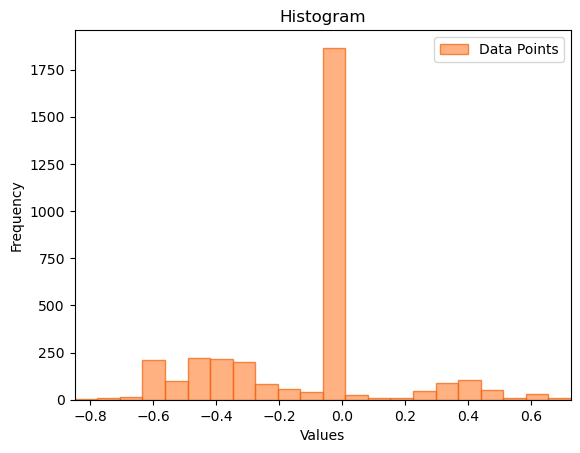


--------------------------------------------------------------------------------
                               Sentiment: 0


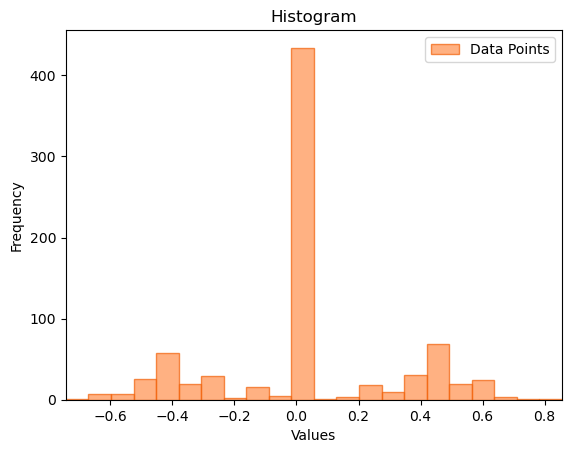


--------------------------------------------------------------------------------
                               Sentiment: 1


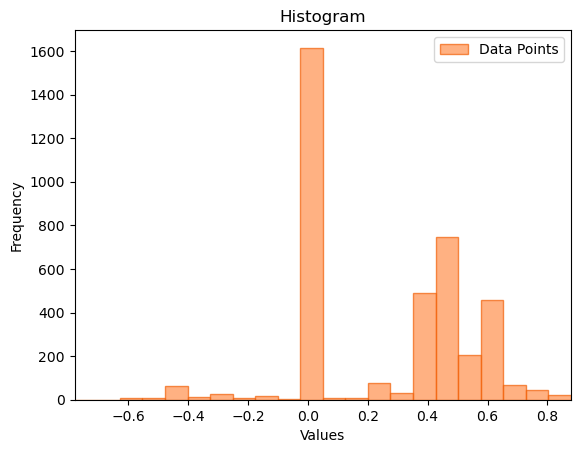

In [34]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    random_functions.histogram(data[data['Sentiment'] == tag]['vader_polarity_compound'])
    print('')


--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 1


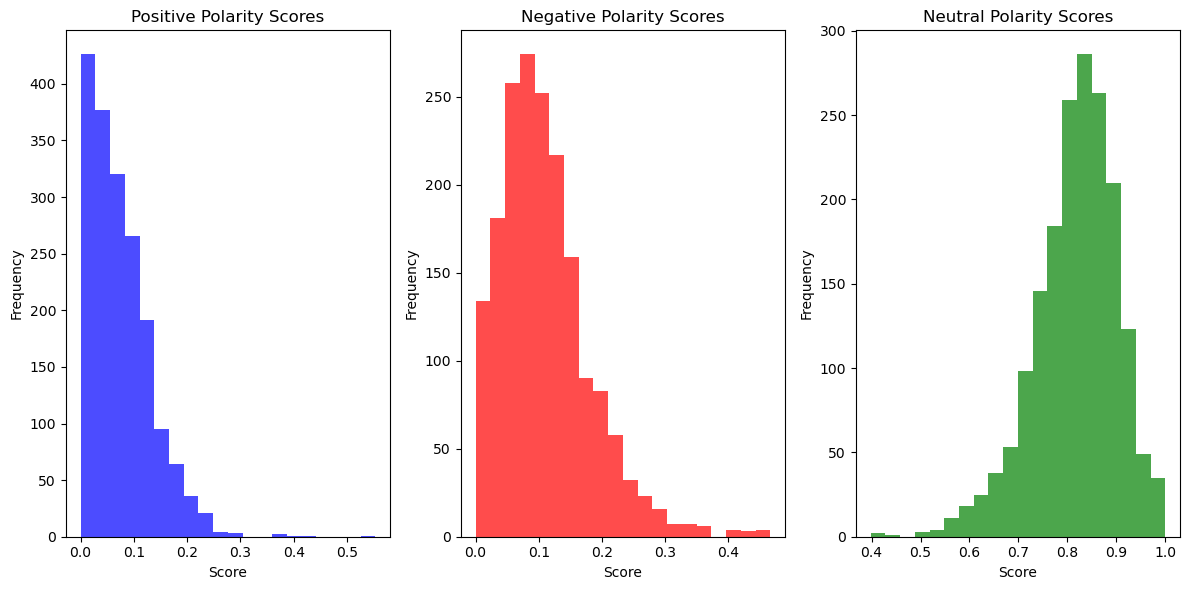

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 2


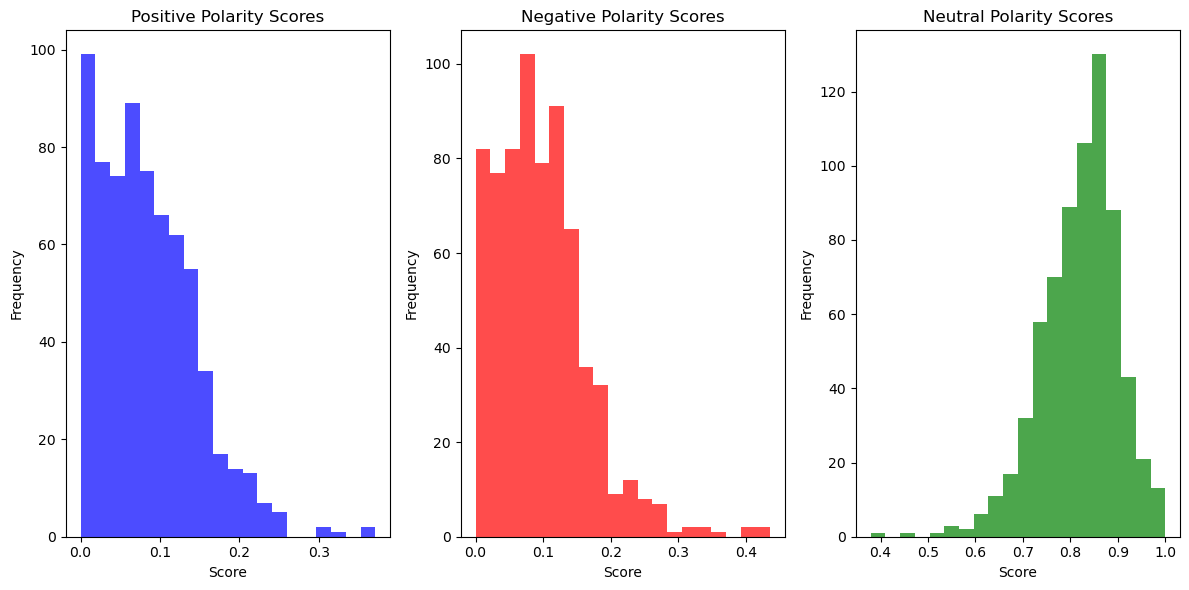

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 3


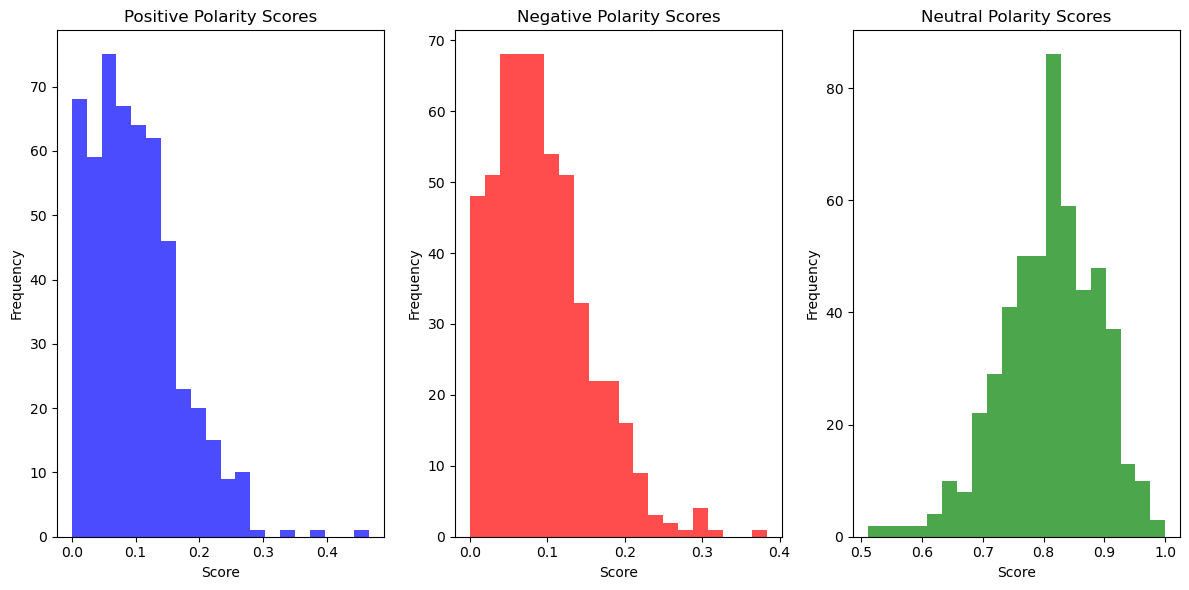

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 4


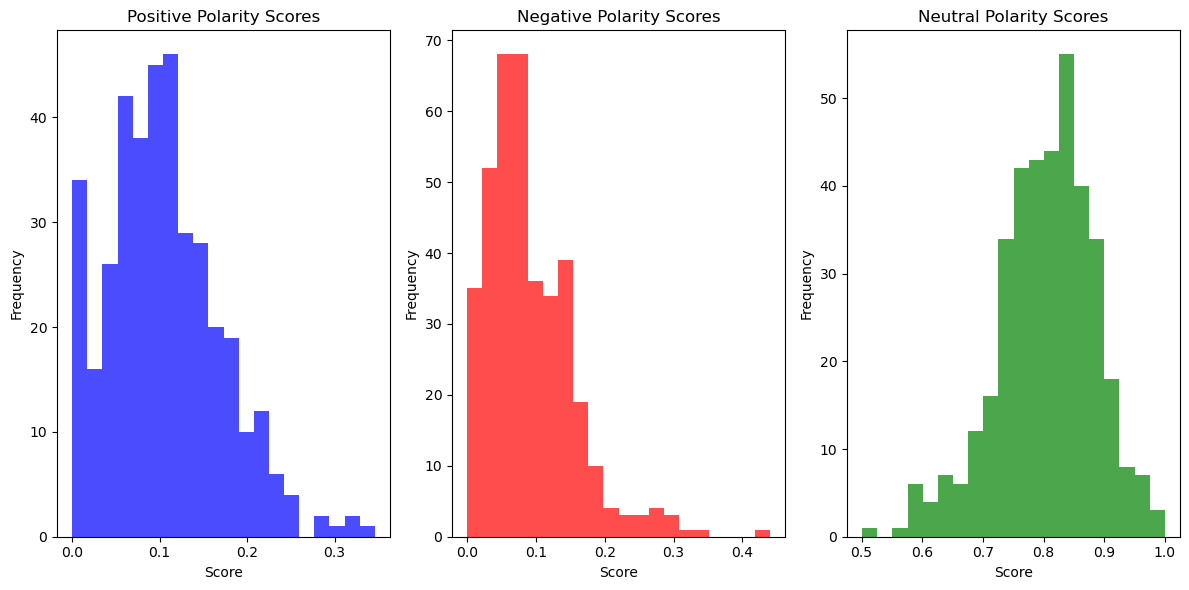

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 5


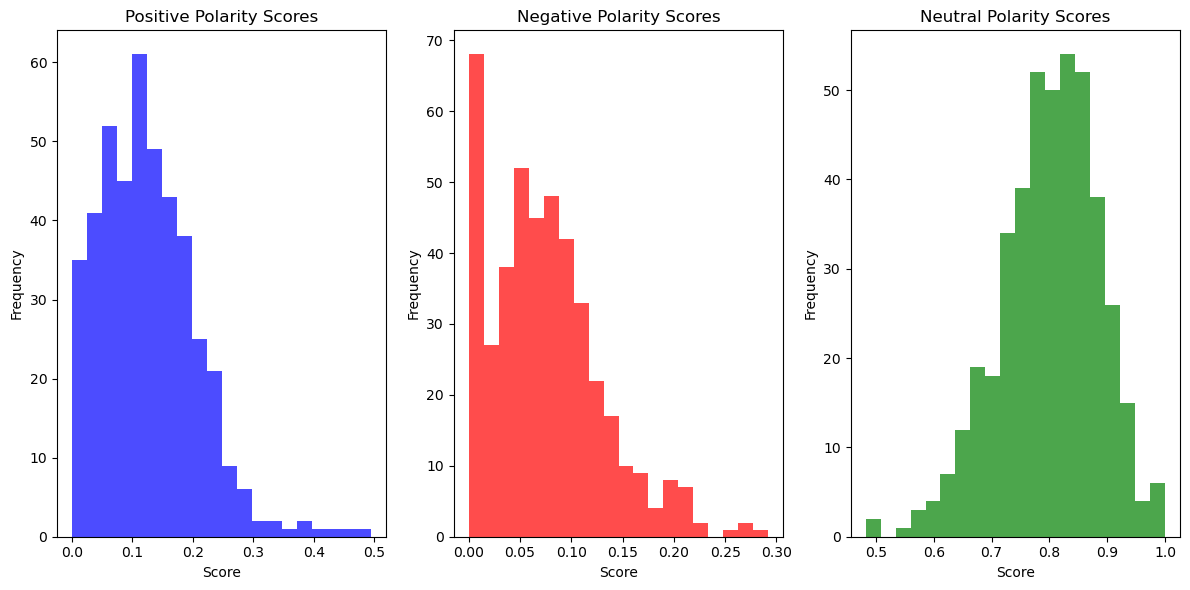

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 6


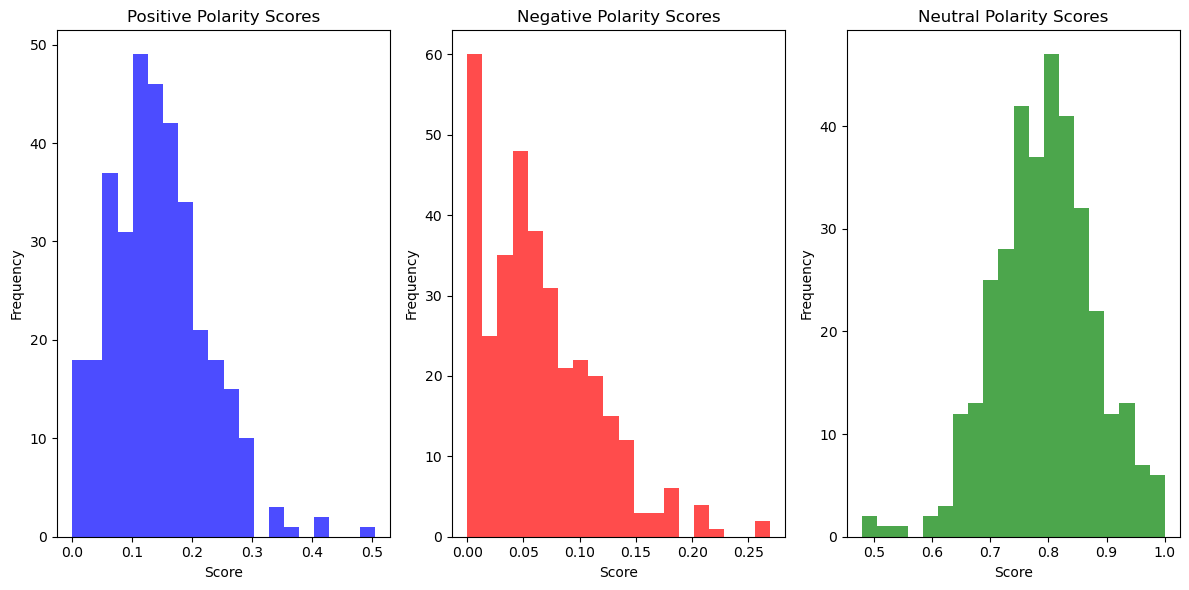

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 7


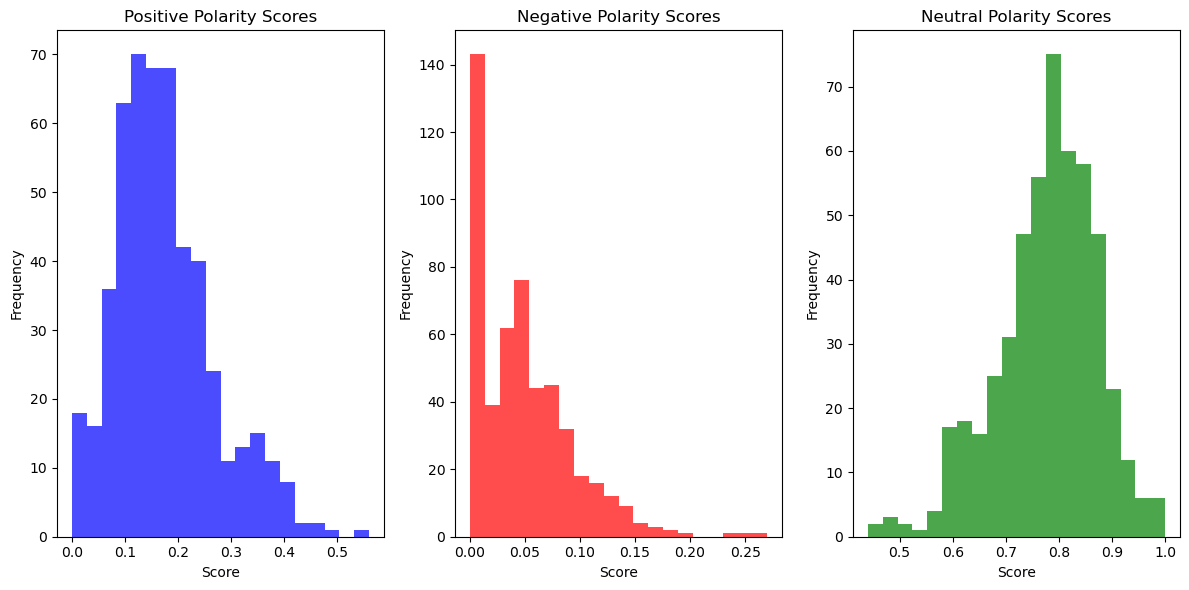

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 8


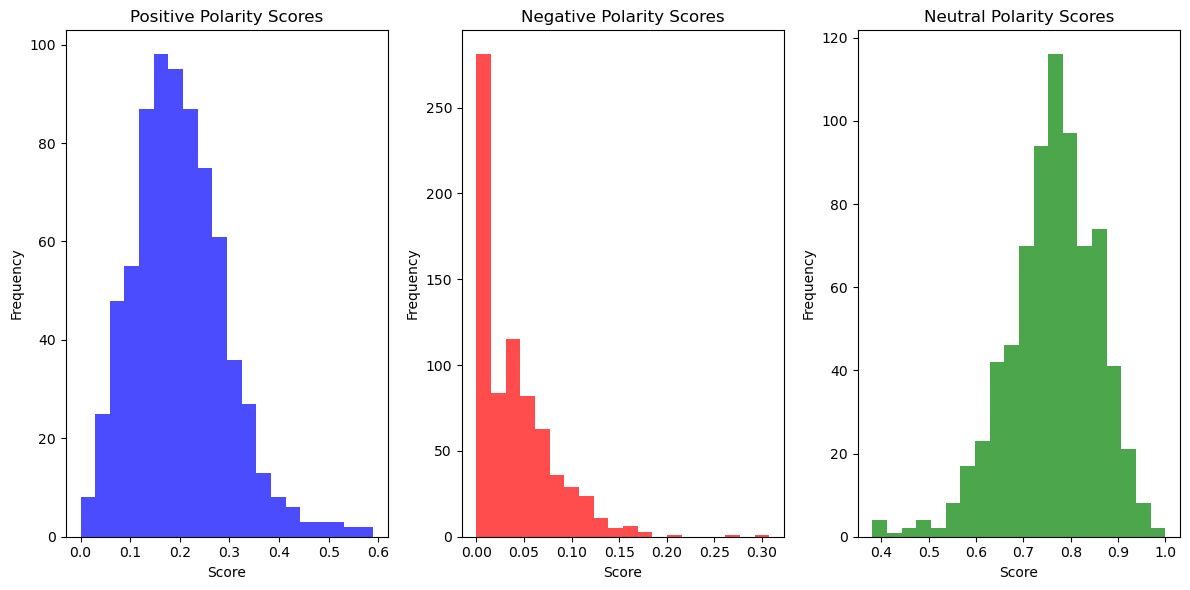

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 9


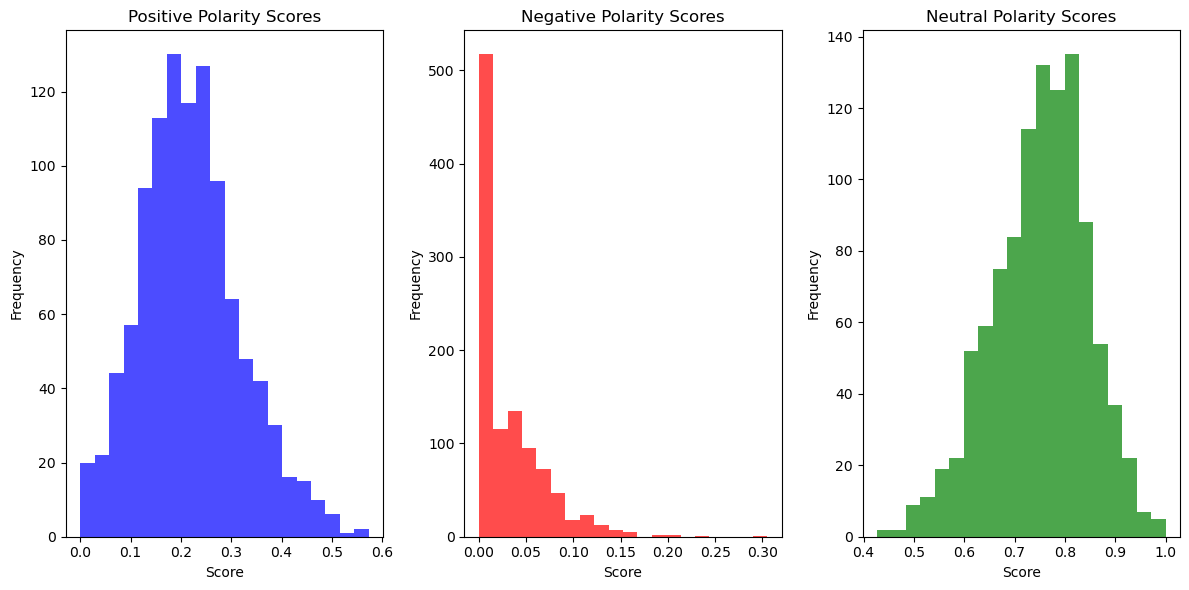

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 10


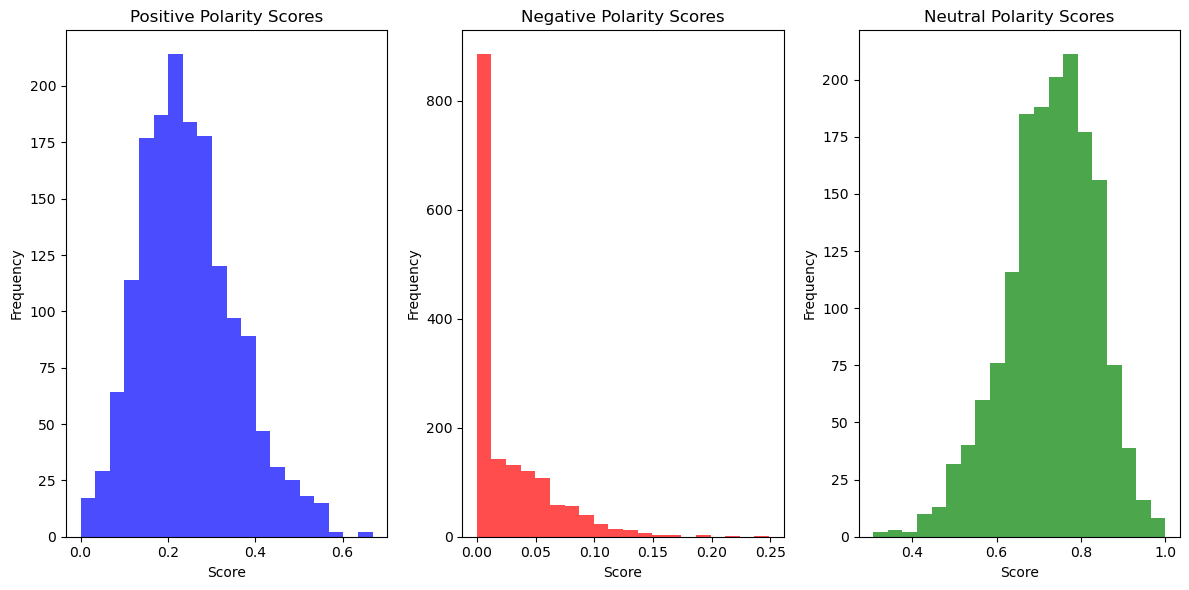

In [37]:
unique_sentiments = sorted(data['Sentiment'].unique())
import matplotlib.pyplot as plt
# Loop through sorted unique sentiments
for sentiment in unique_sentiments:
    print('--' * 55)
    print(' ' * 50, f'Sentiment: {sentiment}')
    
    # Get Vader polarity scores for the current sentiment
    vader_scores = data[data['Sentiment'] == sentiment]['vader_polarity_scores']

    # Plot histogram for each polarity score
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.hist(vader_scores.apply(lambda x: x['pos']), bins=20, color='blue', alpha=0.7)
    plt.title('Positive Polarity Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(vader_scores.apply(lambda x: x['neg']), bins=20, color='red', alpha=0.7)
    plt.title('Negative Polarity Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(vader_scores.apply(lambda x: x['neu']), bins=20, color='green', alpha=0.7)
    plt.title('Neutral Polarity Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

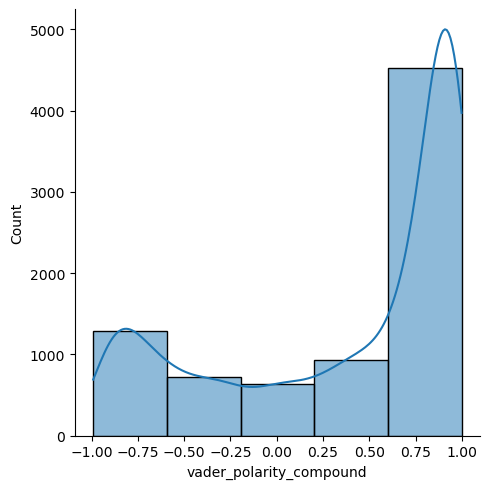

In [39]:
import seaborn as sns
score_graph = sns.displot(data["vader_polarity_compound"], kde=True, bins=5)
plt.show()

In [40]:
data['Sentiment'].unique()

array([ 9,  3, 10,  5,  4,  2,  8,  1,  7,  6])

Sentiment 9


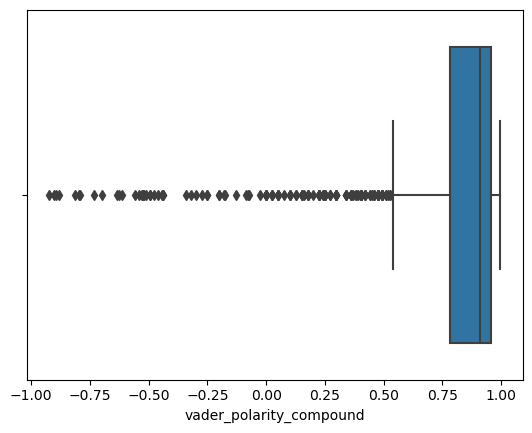

Sentiment 3


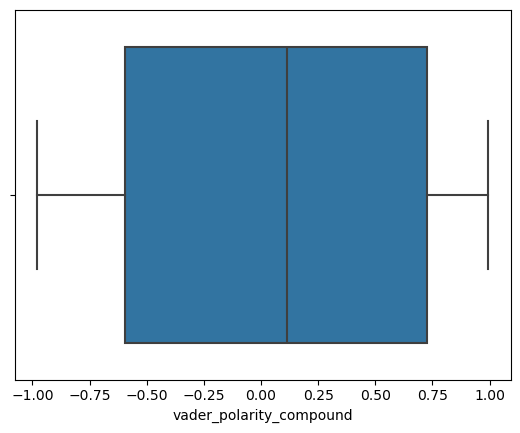

Sentiment 10


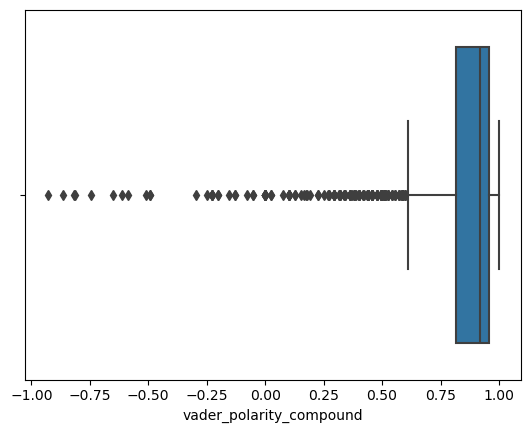

Sentiment 5


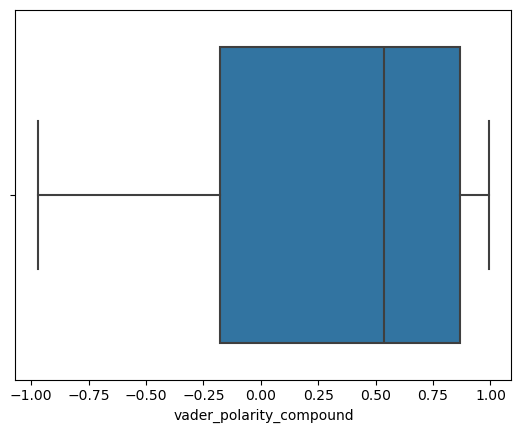

Sentiment 4


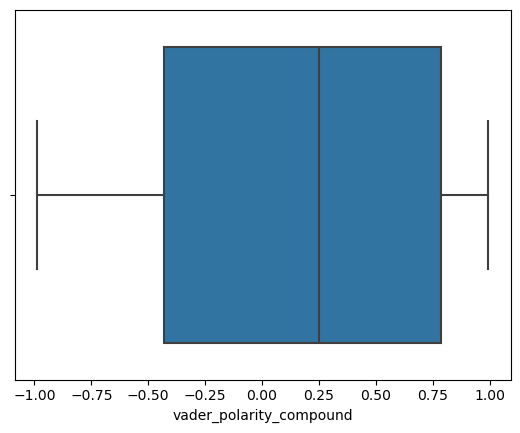

Sentiment 2


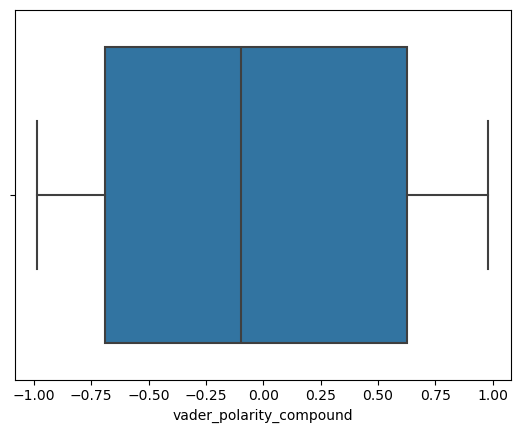

Sentiment 8


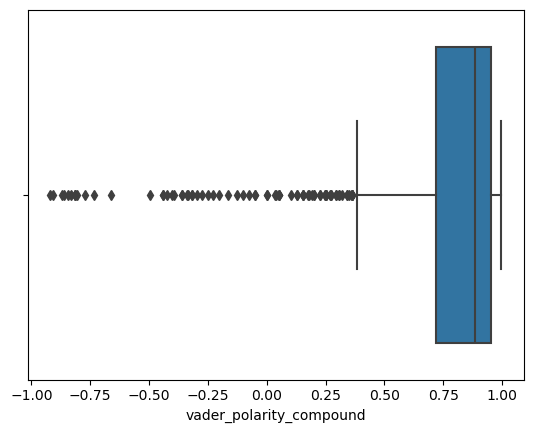

Sentiment 1


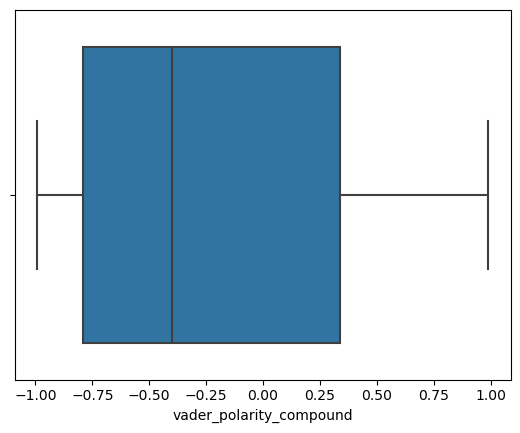

Sentiment 7


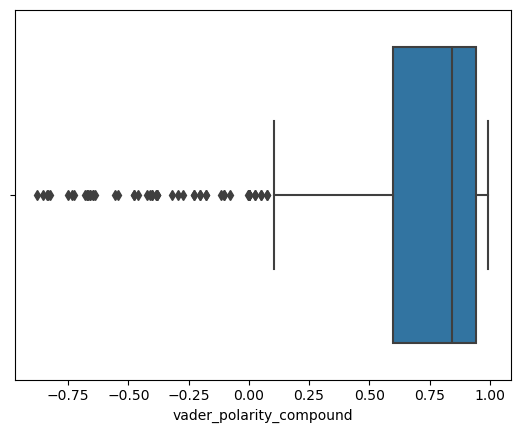

Sentiment 6


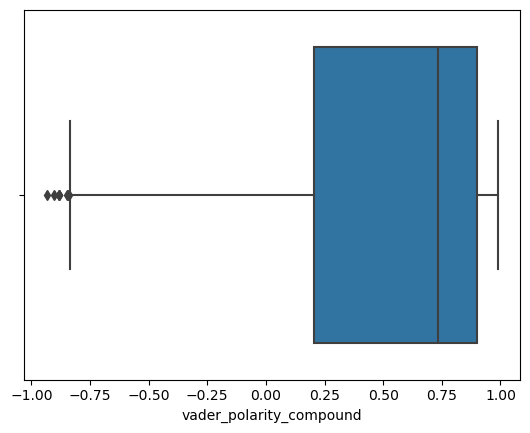

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on the condition

for i in data['Sentiment'].unique():
    filtered_data = data[data['Sentiment'] == i]

# Plot the boxplot
    print(f'Sentiment {i}')
    sns.boxplot(data=filtered_data, x="vader_polarity_compound")
    plt.show()


### Vader

In [68]:
data["vader_polarity_compound_2"] = data["Title"].apply(lambda song : vader_sa(str(song)))

data["vader_polarity_scores_2"] = data["Title"].apply(lambda song : vader_sa(str(song), compound = False))

In [69]:
data.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.129558,0.650024,-0.9914,-0.7430,-0.27320,0.4939,0.9944
1,1672.0,0.422056,0.588594,-0.9868,0.0258,0.68080,0.9022,0.9938
2,3406.0,0.802642,0.293201,-0.9300,0.7906,0.91255,0.9571,0.9984


--------------------------------------------------------------------------------
                               Sentiment: 0


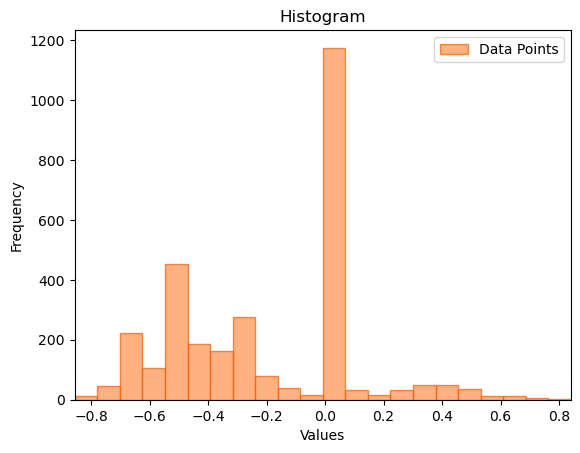


--------------------------------------------------------------------------------
                               Sentiment: 1


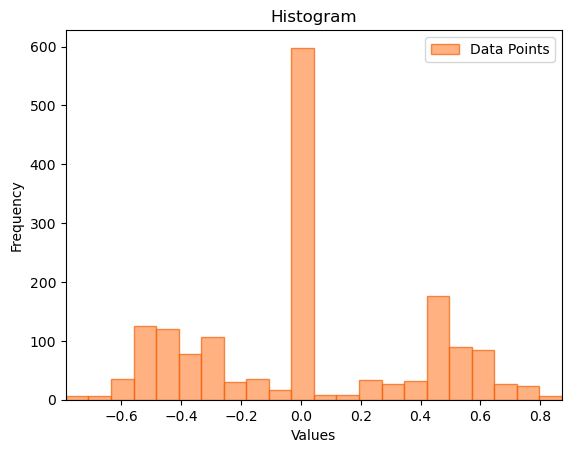


--------------------------------------------------------------------------------
                               Sentiment: 2


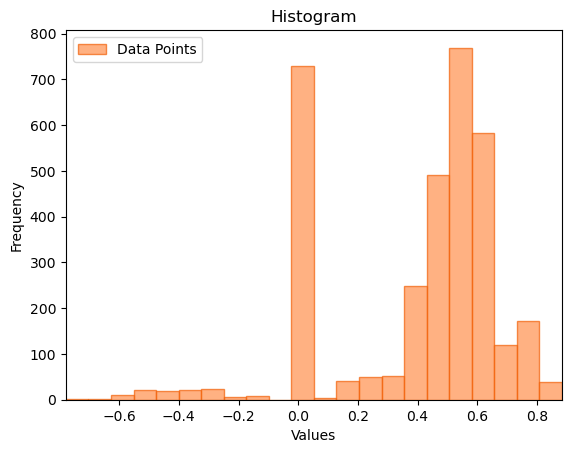

In [70]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    functions.histogram(data[data['Sentiment'] == tag]['vader_polarity_compound_2'])
    print('')


In [ ]:
# maybe join scores of title + reviews and give them weights

## Text Blob

In [42]:
def textblob_sa(song):

    # Get the polarity (compounded polarity scores) for the song
    polarity = TextBlob(song).sentiment.polarity

    return polarity


In [43]:
data["textblob_polarity_compound"] = data["Reviews_1"].apply(lambda song : textblob_sa(str(song)))

In [44]:
data.sample(5)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound
2420,IFE was good throughout,David Taylor,2017-02-28,Qatar Airways,False,London to Lahore return via Doha. Outward Lo...,Business,February 2017,MNL to DXB via DOH,Economy Class,...,1,3,3,10,yes,10,london lahor return via doha. outward london d...,0.4779,"{'neg': 0.061, 'neu': 0.856, 'pos': 0.083, 'co...",0.123035
4664,poor inflight product and service,Arthur van Eerden,2022-12-03,Turkish Airlines,True,Booked FRA-IST-NBO. Delayed out of FRA with ...,Solo Leisure,November 2022,Boston to Bishkek via Istanbul,Economy Class,...,2,1,2,2,no,2,book fra-ist-nbo. delay fra explan. cabin crew...,-0.8360,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp...",-0.061429
1957,blows away the competition,Rajan Parrikar,2019-01-28,Qatar Airways,True,"Mumbai to Doha, on a Boeing 777. On this fli...",Solo Leisure,January 2019,Doha to New York JFK,Business Class,...,5,3,4,10,yes,10,"mumbai doha, boe 777. on flight qsuit configur...",0.8625,"{'neg': 0.021, 'neu': 0.863, 'pos': 0.116, 'co...",0.039286
698,airline had the old cabin product,Adrian Suharto,2018-01-05,Singapore Airlines,True,Business class from Haneda to Singapore. The ...,Couple Leisure,January 2018,Singapore to San Francisco,Business Class,...,5,5,4,8,yes,8,busi class haneda singapor. the airlin old cab...,0.5719,"{'neg': 0.046, 'neu': 0.881, 'pos': 0.073, 'co...",0.011451
5638,can’t recommend this airline,Ilia Ivanov,2018-08-05,Turkish Airlines,False,Moscow to Antalya. Flew Turkish Airlines in ...,Family Leisure,June 2018,Istanbul to Madrid,Economy Class,...,5,4,3,7,no,7,moscow antalya. flew turkish airlin june 2018....,0.9313,"{'neg': 0.068, 'neu': 0.589, 'pos': 0.343, 'co...",0.410000


In [45]:
data.groupby('Sentiment')['textblob_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
1,1808.0,-0.028848,0.198242,-1.0000,-0.121429,-0.008333,0.075217,1.00
2,692.0,0.016564,0.177648,-1.0000,-0.075825,0.019115,0.108333,0.85
3,522.0,0.041142,0.174262,-0.6000,-0.056051,0.051100,0.141250,0.80
4,381.0,0.065919,0.184010,-0.7500,-0.050000,0.058256,0.171429,0.70
5,436.0,0.110363,0.185476,-0.5875,0.000000,0.108494,0.218428,0.80
6,346.0,0.137480,0.183563,-0.5875,0.017976,0.128675,0.235777,1.00
7,509.0,0.202888,0.173841,-0.5000,0.088021,0.197222,0.307143,0.75
8,742.0,0.256623,0.180314,-0.3000,0.135000,0.240495,0.355114,1.00
9,1054.0,0.275278,0.182720,-0.5000,0.158333,0.269291,0.377101,1.00


In [46]:
data.loc[(data['textblob_polarity_compound'] > 0.5) & (data['Sentiment'] == 0)]

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound


In [47]:
observation = data.loc[6607]
observation['Reviews']

'  Paris to Geneva. We made our flight reservations over 6 months ago and because we did not check in online 36 hours before, 3 or the 4 of us were put on standby! 2 of us were already able to get our tickets and we are still waiting to see if the 4th person in our party will make the flight. We have a 4 hour drive that we will have to wait on him for. What kind of airline gives their paying passengers tickets away just because they don’t check in online?  I also ended up paying $150 to check bags. '

--------------------------------------------------------------------------------
                               Sentiment: 1


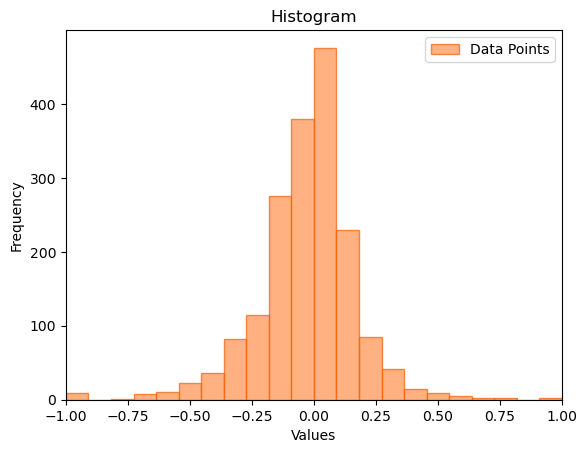


--------------------------------------------------------------------------------
                               Sentiment: 2


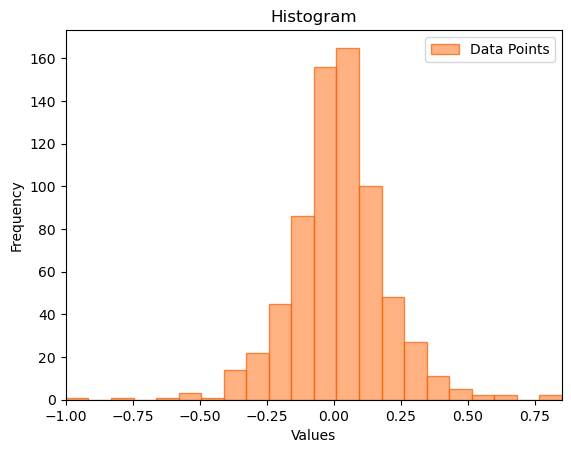


--------------------------------------------------------------------------------
                               Sentiment: 3


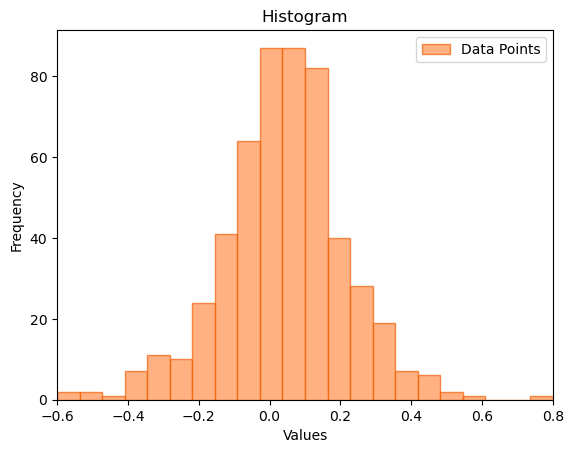


--------------------------------------------------------------------------------
                               Sentiment: 4


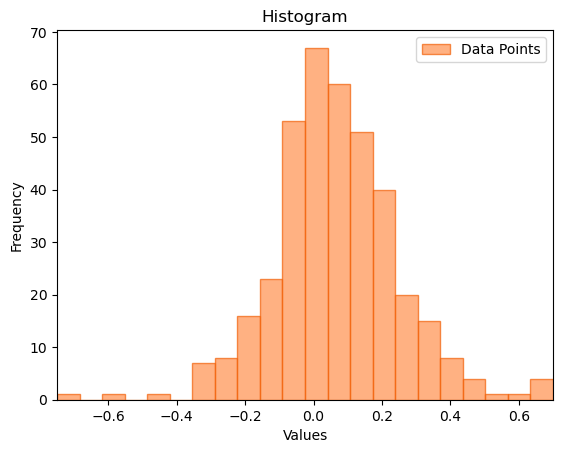


--------------------------------------------------------------------------------
                               Sentiment: 5


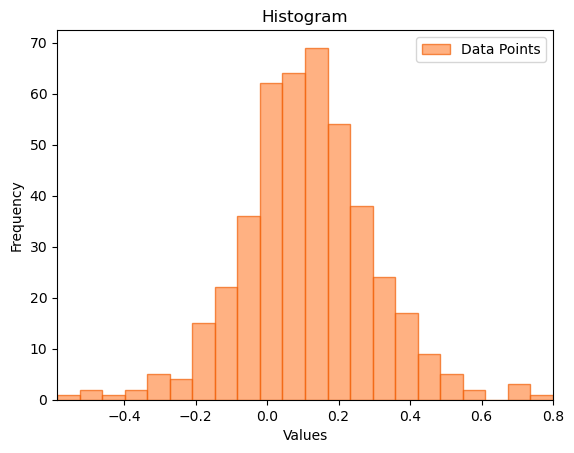


--------------------------------------------------------------------------------
                               Sentiment: 6


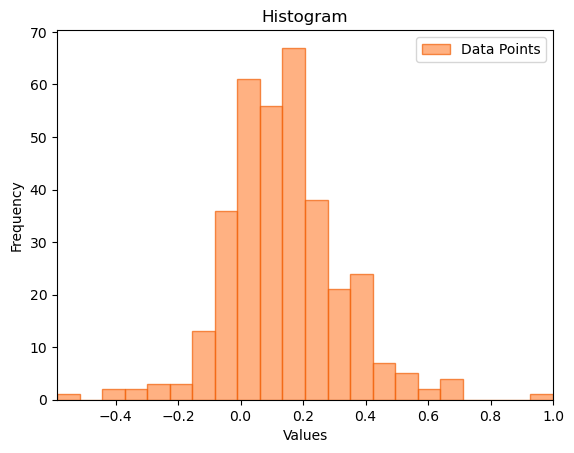


--------------------------------------------------------------------------------
                               Sentiment: 7


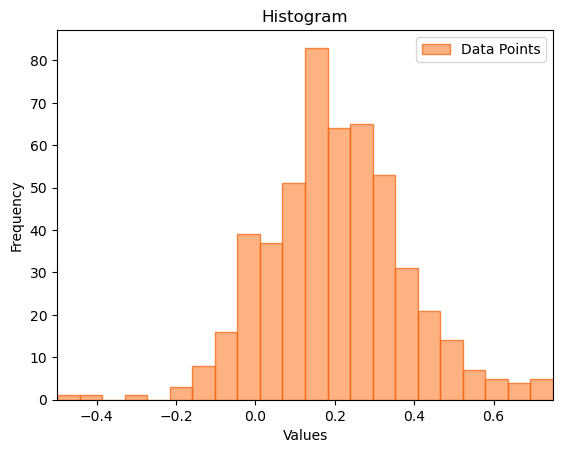


--------------------------------------------------------------------------------
                               Sentiment: 8


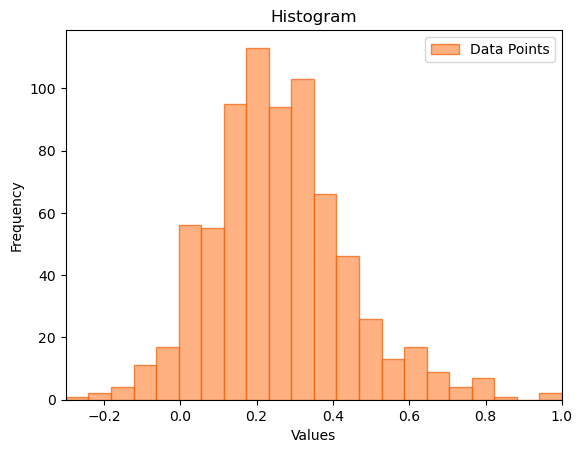


--------------------------------------------------------------------------------
                               Sentiment: 9


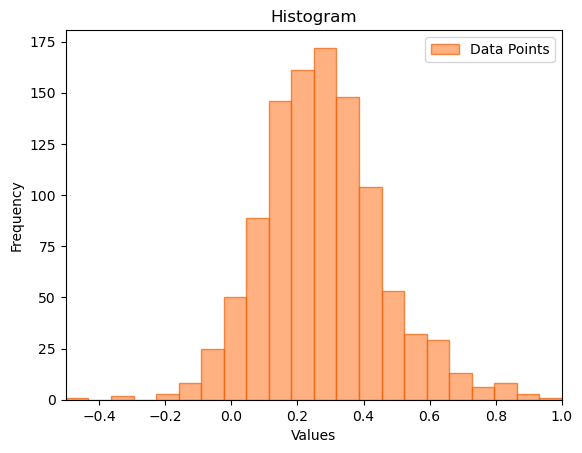


--------------------------------------------------------------------------------
                               Sentiment: 10


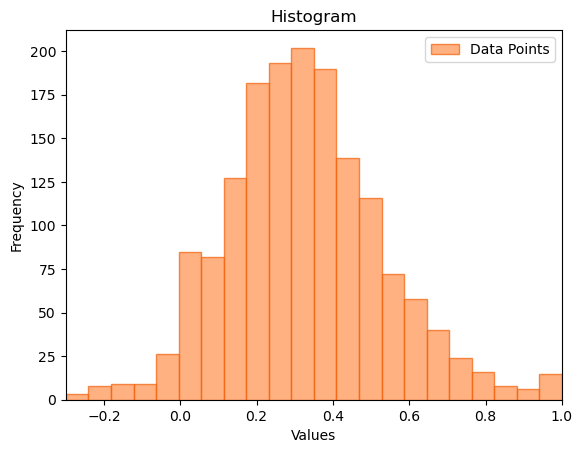

In [48]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    functions.histogram(data[data['Sentiment'] == tag]['textblob_polarity_compound'])
    print('')


## AFINN

In [37]:
%pip install afinn

  Using cached afinn-0.1.tar.gz (52 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=2dab8ba314670b853be3dd4ed5f120508bb20e1d1e3a3aed0943c5596c730b86
  Stored in directory: /Users/antoniooliveira/Library/Caches/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


In [49]:
from afinn import Afinn

afinn = Afinn()

data['Afinn_polarity_compound'] = data['Reviews_1'].apply(lambda x: 
                                              afinn.score(x))

In [50]:
data[['Reviews_1', 'Afinn_polarity_compound']]

,Reviews_1,Afinn_polarity_compound
0,"flight amaz. the crew onboard flight welcom, g...",9.0
1,book emerg exit seat still meant huge discomfo...,-7.0
2,excel perform front. would definit choos use a...,0.0
3,pretti comfort flight consid fli economi class...,11.0
4,the servic consist good start finish. the cabi...,14.0
...,...,...
8095,"ke124, brisban incheon( a330) ke867, incheon u...",2.0
8096,our recent flight fourth trip uk year sydney l...,17.0
8097,flew korean air bali seoul prestig class( busi...,-5.0
8098,"seoul pari korean air. travel triathlon bike, ...",10.0


In [51]:
data.groupby('Sentiment')['Afinn_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
1,1808.0,-2.609513,6.099358,-37.0,-6.0,-2.0,1.00,28.0
2,692.0,-0.929191,6.162715,-26.0,-4.0,-1.0,3.00,26.0
3,522.0,0.201149,6.753101,-25.0,-4.0,-0.5,3.00,40.0
4,381.0,1.139108,6.343174,-25.0,-3.0,1.0,5.00,38.0
5,436.0,3.181193,7.054254,-18.0,-1.0,2.0,7.00,35.0
6,346.0,4.708092,6.440253,-10.0,0.0,4.0,8.75,26.0
7,509.0,7.424361,7.437183,-10.0,3.0,6.0,11.00,43.0
8,742.0,9.136119,7.473322,-9.0,4.0,8.0,13.00,38.0
9,1054.0,9.517078,7.363393,-13.0,5.0,9.0,13.00,48.0


Sentiment 9


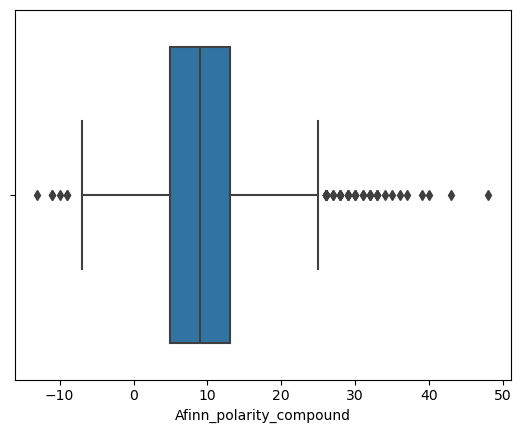

Sentiment 3


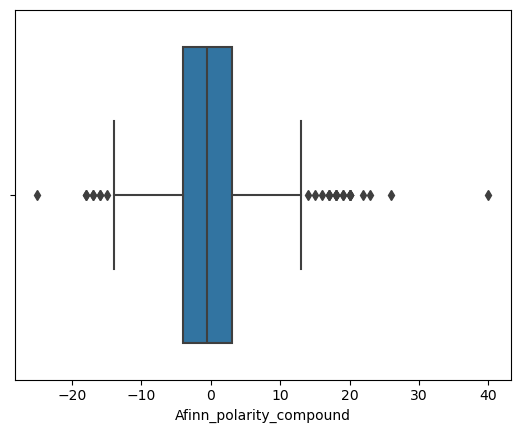

Sentiment 10


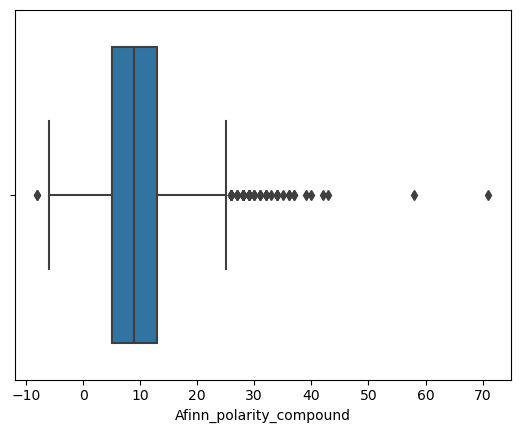

Sentiment 5


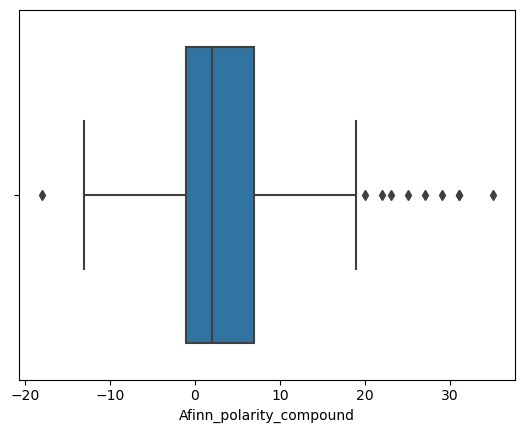

Sentiment 4


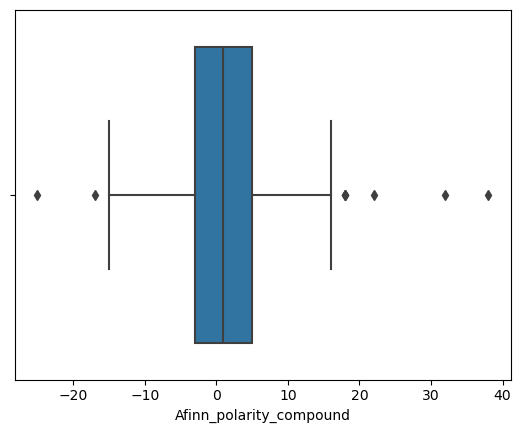

Sentiment 2


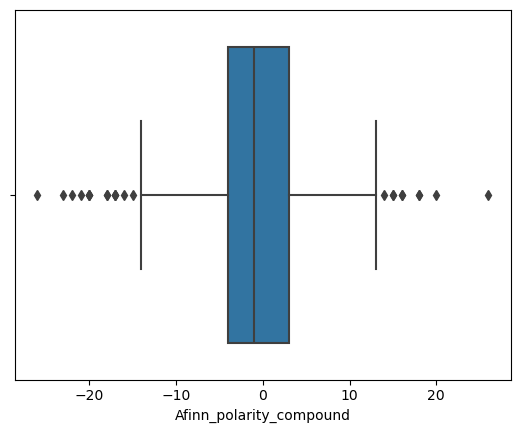

Sentiment 8


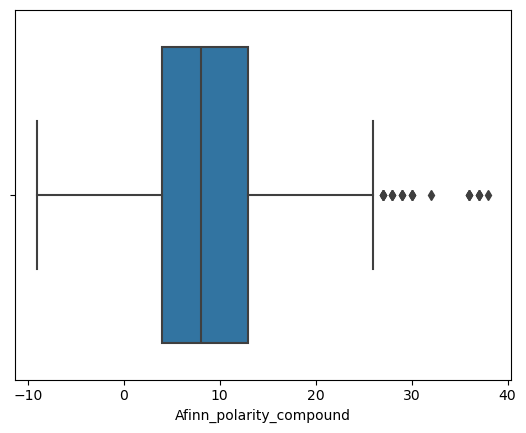

Sentiment 1


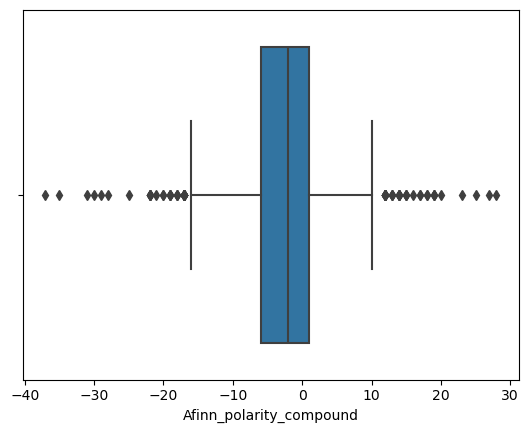

Sentiment 7


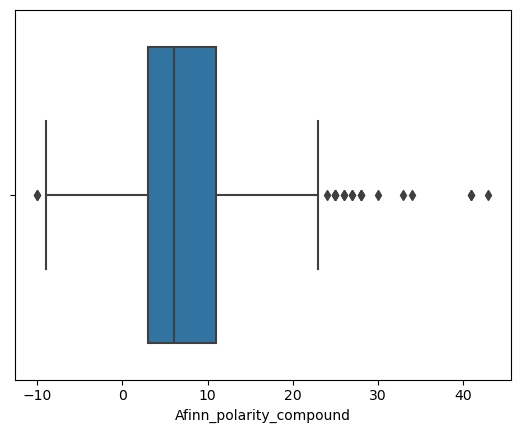

Sentiment 6


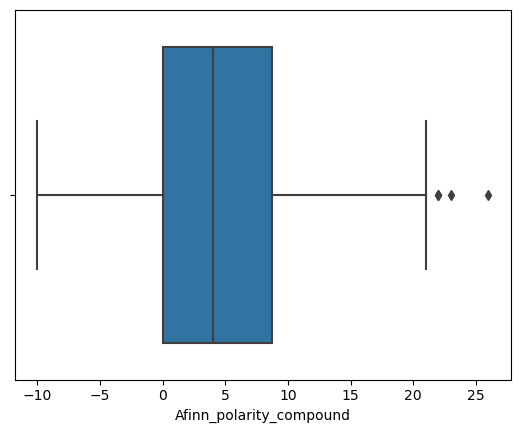

In [52]:
for i in data['Sentiment'].unique():
    filtered_data = data[data['Sentiment'] == i]

# Plot the boxplot
    print(f'Sentiment {i}')
    sns.boxplot(data=filtered_data, x="Afinn_polarity_compound")
    plt.show()

--------------------------------------------------------------------------------
                               Sentiment: 1


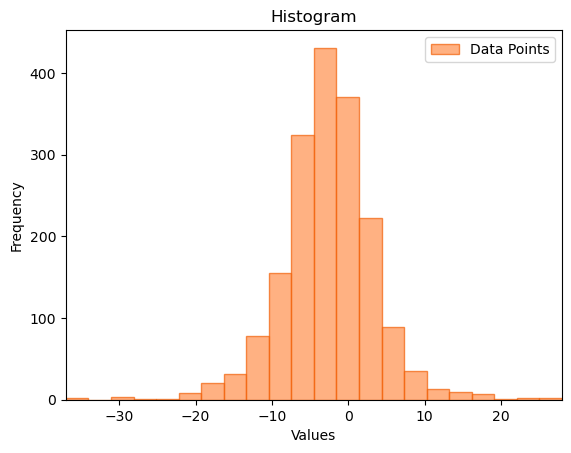


--------------------------------------------------------------------------------
                               Sentiment: 2


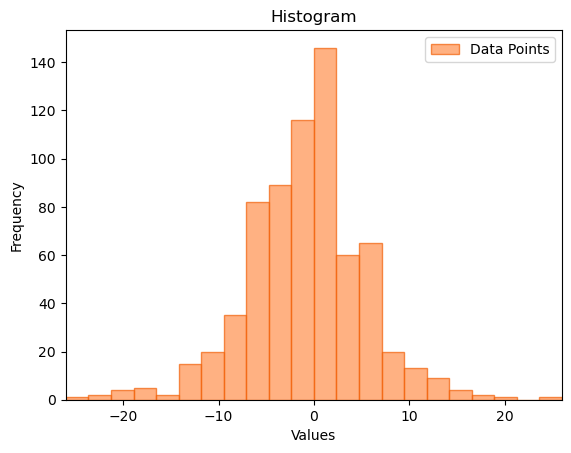


--------------------------------------------------------------------------------
                               Sentiment: 3


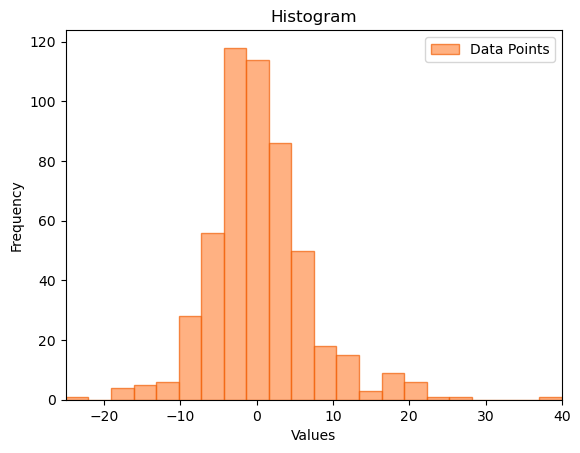


--------------------------------------------------------------------------------
                               Sentiment: 4


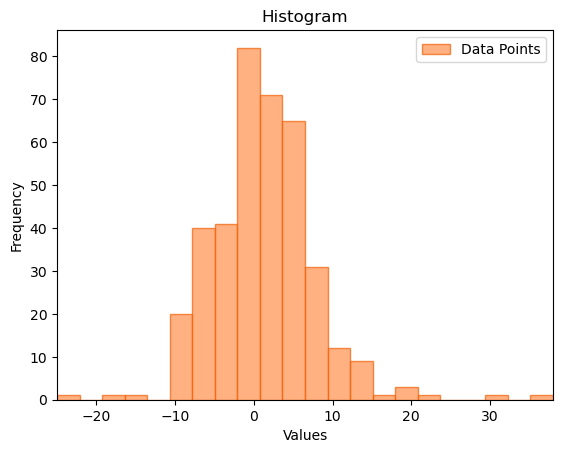


--------------------------------------------------------------------------------
                               Sentiment: 5


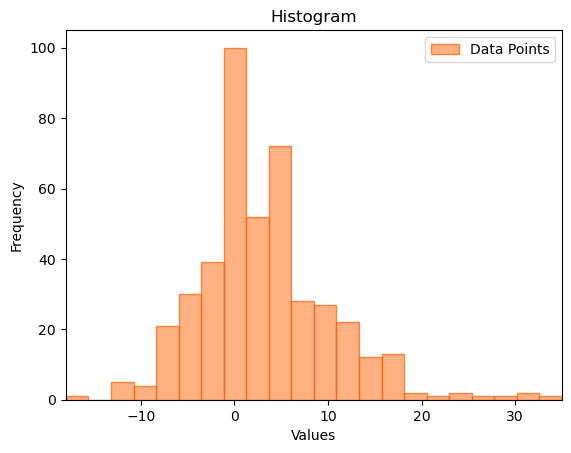


--------------------------------------------------------------------------------
                               Sentiment: 6


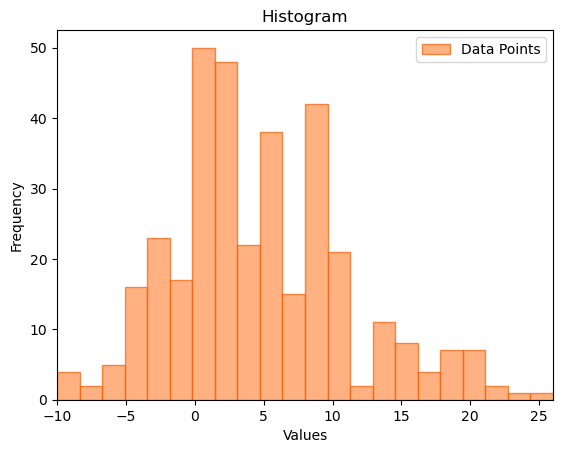


--------------------------------------------------------------------------------
                               Sentiment: 7


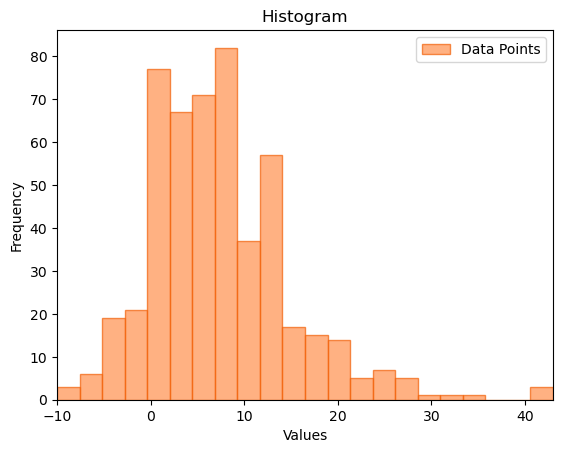


--------------------------------------------------------------------------------
                               Sentiment: 8


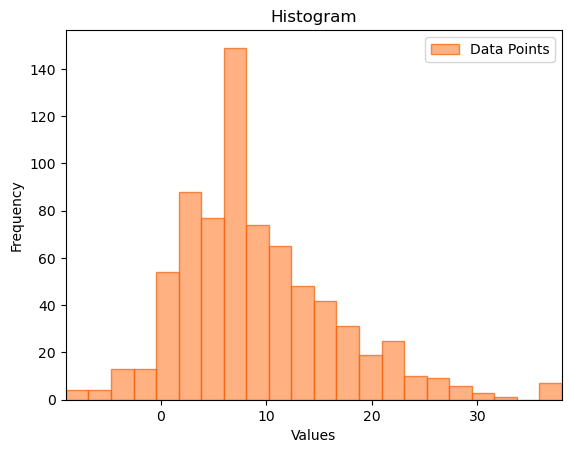


--------------------------------------------------------------------------------
                               Sentiment: 9


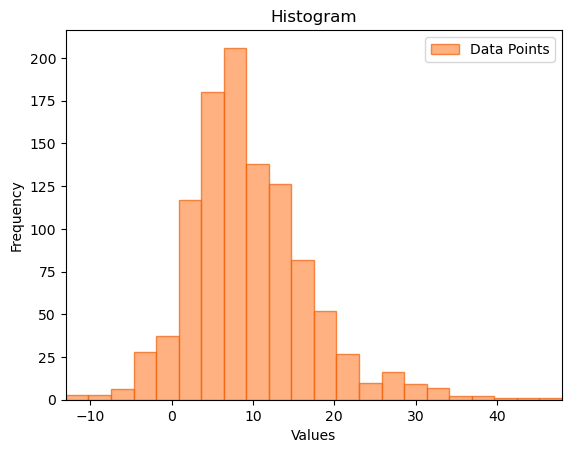


--------------------------------------------------------------------------------
                               Sentiment: 10


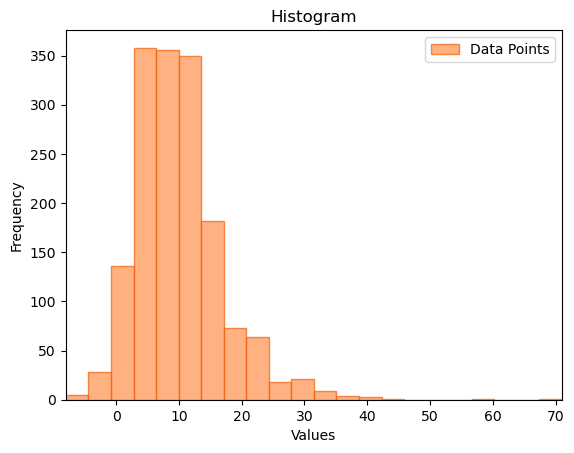

In [53]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    functions.histogram(data[data['Sentiment'] == tag]['Afinn_polarity_compound'])
    print('')


In [55]:
data[(data['Sentiment'] == 1) & (data['Afinn_polarity_compound'] > 10)]

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound,Afinn_polarity_compound
380,not recommend this airline,G Beyne,2019-11-02,Singapore Airlines,True,London to Christchurch via Singapore. London...,Solo Leisure,October 2019,Singapore to Johannesburg,Business Class,...,5,1,1,no,1,london christchurch via singapor. london singa...,0.9818,"{'neg': 0.069, 'neu': 0.688, 'pos': 0.243, 'co...",0.271795,19.0
428,unable to select the seat,R Hicks,2019-08-31,Singapore Airlines,True,We have flown multiple times via Singapore a...,Couple Leisure,August 2019,Melbourne to Singapore,Business Class,...,4,1,1,no,1,we flown multipl time via singapor airlin occa...,0.9501,"{'neg': 0.024, 'neu': 0.834, 'pos': 0.141, 'co...",0.032937,14.0
487,I would not recommend,Andrew Tucker,2019-05-01,Singapore Airlines,True,I cannot believe that this flight was the ex...,Solo Leisure,March 2019,Singapore to Melbourne,Economy Class,...,5,1,1,no,1,"believ flight exact opposit last flight sia, w...",0.9758,"{'neg': 0.038, 'neu': 0.737, 'pos': 0.225, 'co...",0.128333,18.0
560,disappointed this time,Jiaolong Yang,2018-12-14,Singapore Airlines,True,"Dubai to Singapore, with business class seat...",Business,December 2018,Barcelona to Manila via Milan / Singapore,Business Class,...,3,2,1,no,1,"dubai singapor, busi class seat 12a, cabin ama...",0.9497,"{'neg': 0.044, 'neu': 0.758, 'pos': 0.198, 'co...",0.220833,15.0
1996,not that great,Ramachandran Ashok Kumar,2018-11-17,Qatar Airways,True,Bangalore to Nice via Doha. My experience fr...,Business,November 2018,Doha to Manchester,Economy Class,...,5,1,1,no,1,bangalor nice via doha. my experi great comfor...,0.9840,"{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'comp...",0.685714,28.0
2505,great flat bed seat and pajamas,P Werton,2016-09-08,Qatar Airways,True,Amman to Kuala Lumpur via Doha. A very forge...,Solo Leisure,September 2016,BRU to NRT via DOH,Business Class,...,3,3,1,no,1,"amman kuala lumpur via doha. forgett check, lo...",0.9501,"{'neg': 0.022, 'neu': 0.735, 'pos': 0.243, 'co...",0.378125,13.0
2520,a good trip and excellent value,B Medraulin,2016-07-24,Qatar Airways,False,Beirut to Bangkok via Doha on Qatar Airways....,Business,July 2016,DXB to KUL via DOH,Economy Class,...,5,5,1,yes,1,beirut bangkok via doha qatar airway. second t...,0.9814,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.273535,20.0
2552,seat was comfortable,Ming Zhang,2016-05-27,Qatar Airways,True,I returned from London Heathrow to Shanghai ...,Solo Leisure,May 2016,PSA to AKL via DOH,Business Class,...,4,4,1,yes,1,return london heathrow shanghai qatar airway. ...,0.9628,"{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...",0.513333,18.0
2560,could not fault Qatar Airways,Michael Davies,2016-05-18,Qatar Airways,False,Manchester to Doha with Qatar Airways. 9am d...,Couple Leisure,April 2016,PSA to AKL via DOH,Business Class,...,3,5,1,yes,1,manchest doha qatar airway. 9am departur- boar...,0.9612,"{'neg': 0.035, 'neu': 0.811, 'pos': 0.154, 'co...",0.232051,17.0
2594,fantastic business class experience,A Ahmed,2016-03-26,Qatar Airways,False,Copenhagen to Melbourne visa Doha return. Th...,Solo Leisure,February 2016,DXB to LHR via DOH,Business Class,...,4,5,1,yes,1,copenhagen melbourn visa doha return. thi fant...,0.9670,"{'neg': 0.028, 'neu': 0.814, 'pos': 0.158, 'co...",0.196778,14.0


In [50]:
pd.set_option('display.max_colwidth', None)

obs = data.loc[8014]
print(obs[['Title', 'Reviews']])


Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

**Normalised AFINN**

In [52]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))

afinn_normalized_polarity = scaler.fit_transform(data["Afinn_polarity_compound"].to_numpy().reshape(-1, 1))

In [56]:
data["afinn_normalized_polarity"] = afinn_normalized_polarity.reshape(-1)
data[['Reviews_1', 'Afinn_polarity_compound', 'afinn_normalized_polarity']].describe()

,Afinn_polarity_compound,afinn_normalized_polarity
count,8100.000000,8100.000000
mean,4.293704,-0.235302
std,8.580267,0.158894
min,-37.000000,-1.000000
25%,-1.000000,-0.333333
50%,4.000000,-0.240741
75%,9.000000,-0.148148
max,71.000000,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       8100 non-null   object 
 1   Name                        8100 non-null   object 
 2   Review Date                 8100 non-null   object 
 3   Airline                     8100 non-null   object 
 4   Verified                    8100 non-null   object 
 5   Reviews                     8100 non-null   object 
 6   Type of Traveller           8100 non-null   object 
 7   Month Flown                 8100 non-null   object 
 8   Route                       8100 non-null   object 
 9   Class                       8100 non-null   object 
 10  Seat Comfort                8100 non-null   int64  
 11  Staff Service               8100 non-null   int64  
 12  Food & Beverages            8100 non-null   int64  
 13  Inflight Entertainment      8100 

## Comparing Methods

In [58]:
compare = ['vader_polarity_compound', 'textblob_polarity_compound', 'afinn_normalized_polarity']

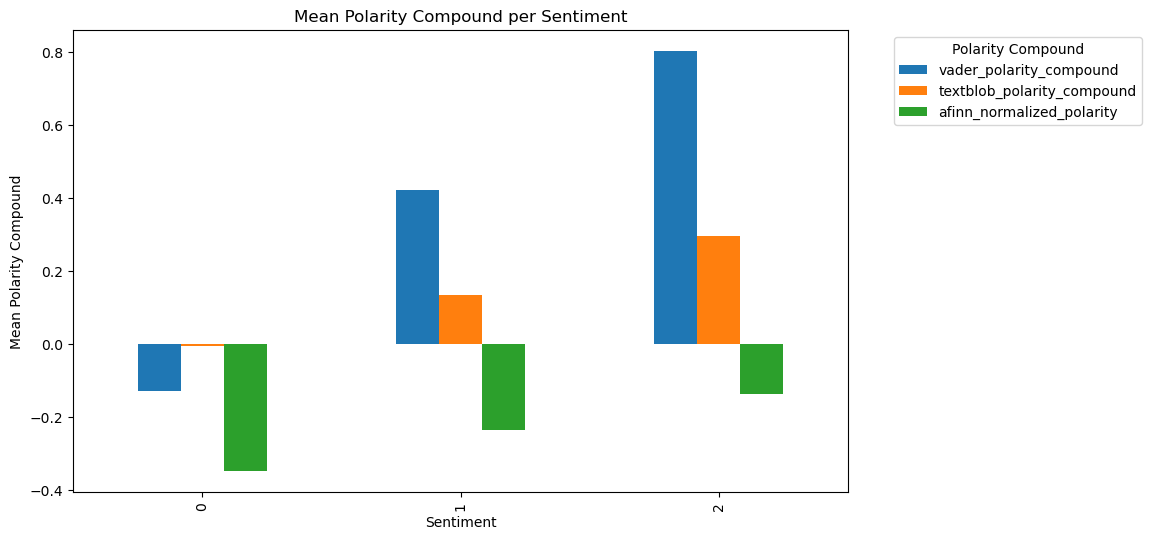

In [59]:
means_by_tag = data.groupby('Sentiment')[compare].mean()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

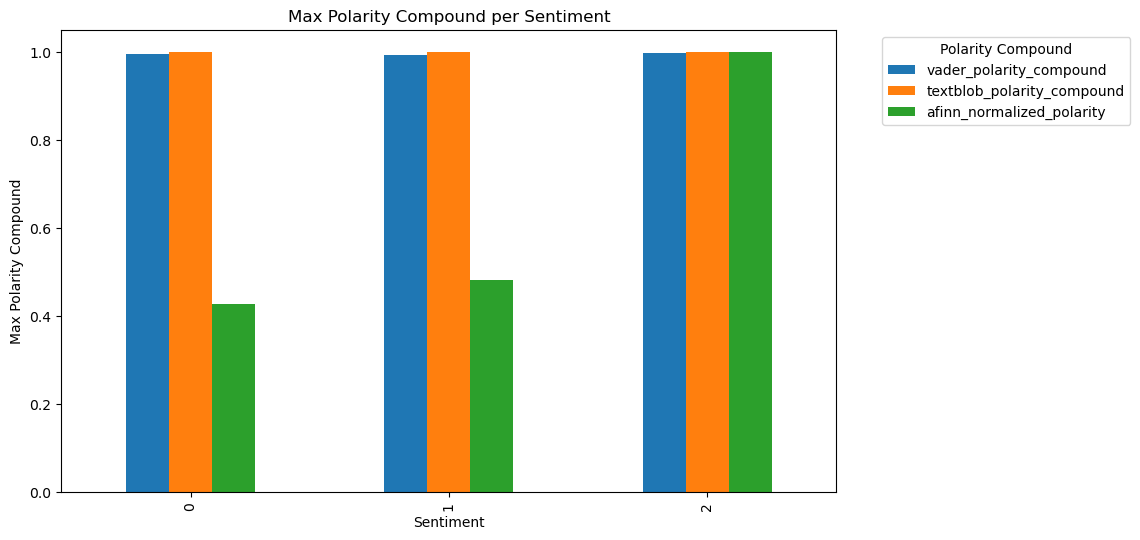

In [62]:
means_by_tag = data.groupby('Sentiment')[compare].max()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Max Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Max Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()